In [1]:
import matplotlib.pyplot as mpl
import numpy as np
import math
import numpy.fft as npfft
%matplotlib inline

In [2]:
def Id(x):
    return x

In [3]:
def Square(x):
    return x**2

In [4]:
def Sin(x):
    return math.sin(x)

In [5]:
def SinOfSquare(x):
    return Sin(x**2)

In [6]:
def SinDividedByX(x):
    return Sin(x) / x

In [7]:
def iExp(x):
    return complex(math.cos(x), math.sin(x))

In [8]:
def FFT(arr, arr_s, begin=0, step=1):
    
    if arr_s == 1: 
        return [arr[begin]]
    
    arr_s_now = arr_s // 2
    step_now = step * 2
    
    arr_now = FFT(arr, arr_s_now, begin, step_now) + FFT(arr, arr_s_now, begin + step, step_now)
    
    for i in range(arr_s_now):
        comp_exp = iExp(-2 * math.pi * i / arr_s)
        arr_now[i], arr_now[i + arr_s_now] = arr_now[i] + comp_exp * arr_now[i + arr_s_now], arr_now[i] - comp_exp * arr_now[i + arr_s_now]
        pass
    
    return arr_now

In [9]:
def FFTReverseCur(arr, arr_s, begin=0, step=1):
    
    if arr_s == 1: 
        return [arr[begin]]
    
    arr_s_now = arr_s // 2
    step_now = step * 2
    
    arr_now = FFTReverseCur(arr, arr_s_now, begin, step_now) + FFTReverseCur(arr, arr_s_now, begin + step, step_now)
    
    for i in range(arr_s_now):
        comp_exp = iExp(2 * math.pi * i / arr_s)
        arr_now[i], arr_now[i + arr_s_now] = arr_now[i] + comp_exp * arr_now[i + arr_s_now], arr_now[i] - comp_exp * arr_now[i + arr_s_now]
        
        pass
    return arr_now

In [10]:
def FFTReverse(arr):
    n = len(arr)
    return [i / n for i in FFTReverseCur(arr, n)]



Тождественная функция

In [14]:
f = np.array([Id(x) for x in np.linspace(0, 10, 8192)], dtype = complex);

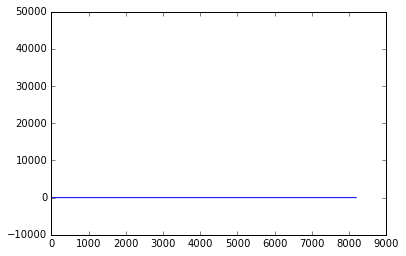

In [15]:
g = FFT(f, f.size)

for i in range(len(g) - 2, len(g) - 1 , 1):
    g[i] = 0

mpl.plot(np.real(g));

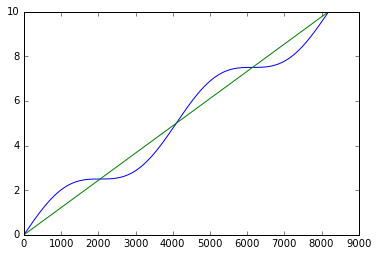

In [16]:
f2 = FFTReverse(g)
mpl.plot(np.real(f2));

mpl.plot(np.real(f));

Квадрат

In [17]:
f = np.array([Square(x) for x in np.linspace(0, 10, 8192)], dtype = complex);


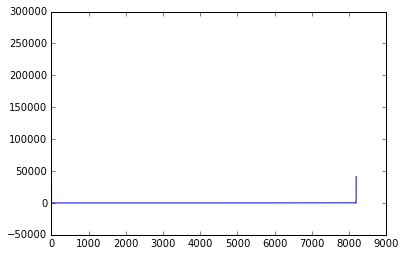

In [18]:
g = FFT(f, f.size)

for i in range(len(g) - 10, len(g) - 1 , 1):
    g[i] = 0
    
mpl.plot(np.real(g));

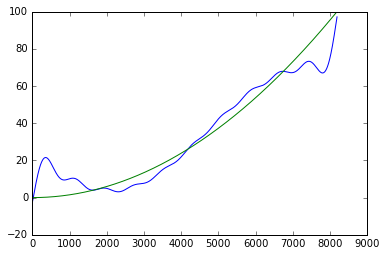

In [19]:
f2 = FFTReverse(g)
mpl.plot(np.real(f2));
mpl.plot(np.real(f));

Синус

In [29]:
f = np.array([Sin(x) for x in np.linspace(0, 10, 8192)], dtype = complex)


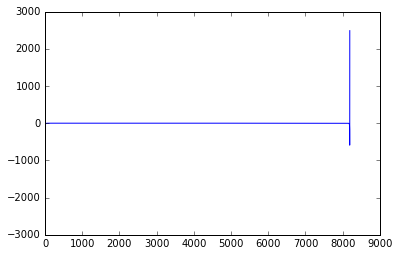

In [30]:
g = FFT(f, f.size)

for i in range(len(g) - 2, len(g) - 1 , 1):
    g[i] = 0
    
mpl.plot(np.real(g));

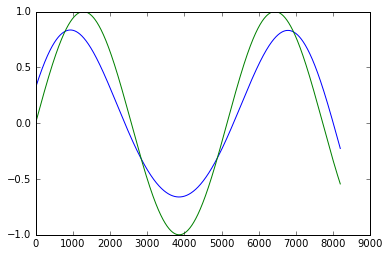

In [31]:
f2 = FFTReverse(g)
mpl.plot(np.real(f2));
mpl.plot(np.real(f));

Синус квадрата

In [23]:
f = np.array([SinOfSquare(x) for x in np.linspace(0, 10, 8192)], dtype = complex)


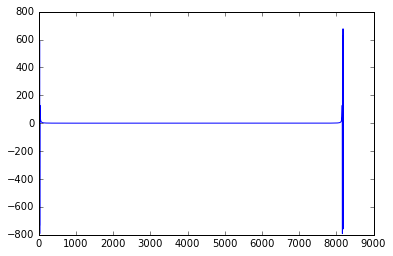

In [24]:
g = FFT(f, f.size)

for i in range(len(g) - 2, len(g) - 1 , 1):
    g[i] = 0

mpl.plot(np.real(g));

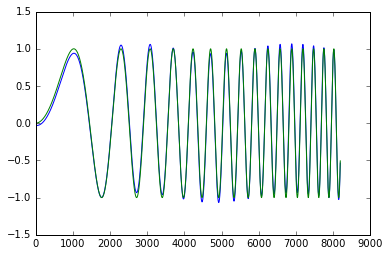

In [25]:
f2 = FFTReverse(g)
mpl.plot(np.real(f2));
mpl.plot(np.real(f));

In [26]:
f = np.array([SinDividedByX(x) for x in np.linspace(1, 10, 8192)], dtype = complex);


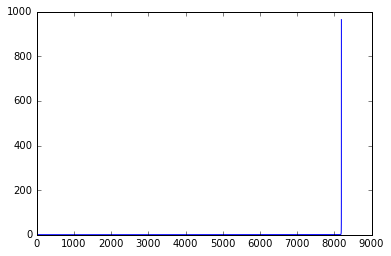

In [27]:
g = FFT(f, f.size)
mpl.plot(np.real(g));

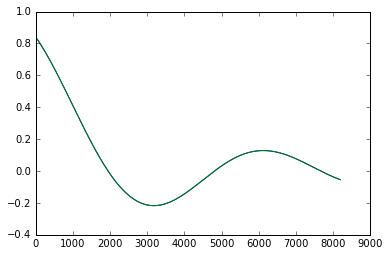

In [28]:
f2 = FFTReverse(g)
mpl.plot(np.real(f2));
mpl.plot(np.real(f));